Experiment : 1 Demonstration and implementation of Shallow architecture, using Python, Tensorflow and Keras.

(A) WITH LIBRARY

Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[0 0] -> 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0 1] -> 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1 0] -> 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1 1] -> 0


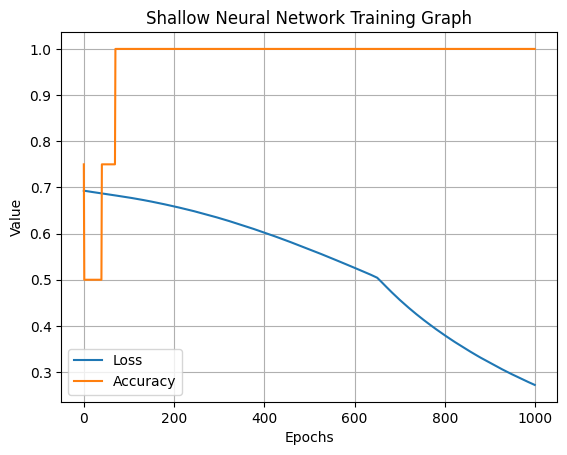

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X, y,
    epochs=1000,
    verbose=0
)

print("Predictions:")
for i in range(len(X)):
    print(X[i], "->", round(model.predict(X)[i][0]))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Shallow Neural Network Training Graph')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

(B) WITHOUT LIBRARY


[[0]
 [1]
 [0]
 [0]]


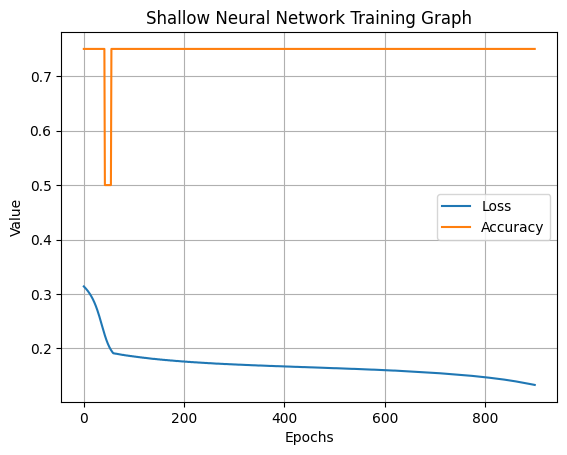

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

np.random.seed(1)
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))

W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

lr = 0.1
epochs = 900

loss_list = []
accuracy_list = []

for epoch in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    loss = np.mean((y - y_pred) ** 2)
    loss_list.append(loss)

    predictions = (y_pred > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracy_list.append(accuracy)

    d_y_pred = 2 * (y_pred - y) / y.shape[0]
    d_z2 = d_y_pred * y_pred * (1 - y_pred)

    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * relu_derivative(z1)

    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

print(predictions)

plt.plot(loss_list, label="Loss")
plt.plot(accuracy_list, label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Shallow Neural Network Training Graph")
plt.legend()
plt.grid(True)
plt.show()